In [4]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#import data
data=pd.read_csv('diabetes_data.csv', sep=';')
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
#merubah tipe data gender ke nominal kuantitatif
data['gender']=[1 if i=='Male' else 0 for i in data['gender']]
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
#melihat jumlah data kelas diabetes
data['class'].unique()

array([1, 0])

In [8]:
#membagi data menjadi variabel dependen dan independe
x=data.drop(['class'], axis=1)
y=data['class']

In [9]:
#membagi data latih dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
#memodelkan dengan regresi logistik untuk klasifikasi
model_log=LogisticRegression(solver='liblinear')
model_log.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [11]:
#koefisien masing masing variabel independen
model_log.coef_[0]

array([-0.02541957, -2.29890461,  2.54840627,  2.6138952 ,  0.90900172,
        0.55370999,  0.41905599,  1.34524345,  0.73145506, -1.2024421 ,
        1.42950549, -0.56873192,  1.00737243, -0.2301063 , -0.24267135,
       -0.18395956])

In [12]:
#konstanta model
model_log.intercept_[0]

0.7387596839994738

In [13]:
pd.DataFrame({'Coefficient':model_log.coef_[0]}, index=data.iloc[:,0:16].columns)

,Coefficient
age,-0.025420
gender,-2.298905
polyuria,2.548406
polydipsia,2.613895
sudden_weight_loss,0.909002
weakness,0.553710
polyphagia,0.419056
genital_thrush,1.345243
visual_blurring,0.731455
itching,-1.202442


In [ ]:
#prediksi model
model_log.predict(data.iloc[1,1:].values.reshape(1,-1))

In [15]:
print(f'Probablititas Keganasan Diabetes : {round(model_log.predict_proba(data.iloc[1,1:].values.reshape(1,-1))[0][1]*100,6)}%')

Probablititas Keganasan Diabetes : 87.919059%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
#prediksi model
y_pred=model_log.predict(x_test)

In [17]:
y_test.values

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [19]:
#perbandingan data aktual dan prediksi
compare=pd.DataFrame({'Actual':y_test, 'Prediction': y_pred})
compare=compare.reset_index().iloc[:,1:]
compare

,Actual,Prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
99,1,1
100,0,0
101,1,1
102,0,0


In [20]:
#menambahkan atribut untuk confusion matrix
result=[]
for i, j in compare.iterrows():
  if j[0]==j[1]:
    if j[1]==0:
      result.append('True Negative')
    else:
      result. append('True Positive')
  else:
    if j[1]==0:
      result.append('False Negative')
    else:
      result.append('False Positive')
compare['result']=result
compare

,Actual,Prediction,result
0,0,0,True Negative
1,1,1,True Positive
2,1,1,True Positive
3,1,1,True Positive
4,1,1,True Positive
...,...,...,...
99,1,1,True Positive
100,0,0,True Negative
101,1,1,True Positive
102,0,0,True Negative


In [21]:
compare['result'].value_counts()

True Positive     68
True Negative     29
False Positive     4
False Negative     3
Name: result, dtype: int64

Text(0.5, 15.0, 'Prediction')

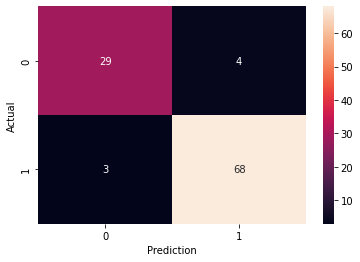

In [23]:
#tabel konfusin matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [24]:
#melihat performa model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104

